# Section 2.1 Distributions and uncertainty in estimates

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3


In [2]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 3
np.random.seed(RANDOM_SEED)

# Distributions and uncertainty in estimates
Why distributions are a fundamental tool in summarizing observations, parameters, and uncertainty

# Revisiting our A/B test
In Lesson 1 we talked about an A/B test. Let's revisit and just focus on the B variant asking the question

*How many conversions did we get?*

In [3]:
# If reading this outside of the video I'm saving the data locally so since we don't cover 
# Sample until a later section!
np.random.seed(RANDOM_SEED)
b = stats.bernoulli(p=.15)
b_observations = b.rvs(100)
np.savetxt("b_observations.txt", b_observations)

In [4]:
b_observations = np.loadtxt("b_observations.txt")
b_observations 

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

An array all well and good but it's hard to make sense of a 100 length array
but at least we can see all the numbers on screen.

Now imagine if we instead had 1000, or 10000 observations. Staring at an array won't be feasible

# Observed distribution
Great news is we can use distributions to summarize the results. In this case we have plotting the observed distribution 

This is great because it clearly shows the number conversions, and non conversions.

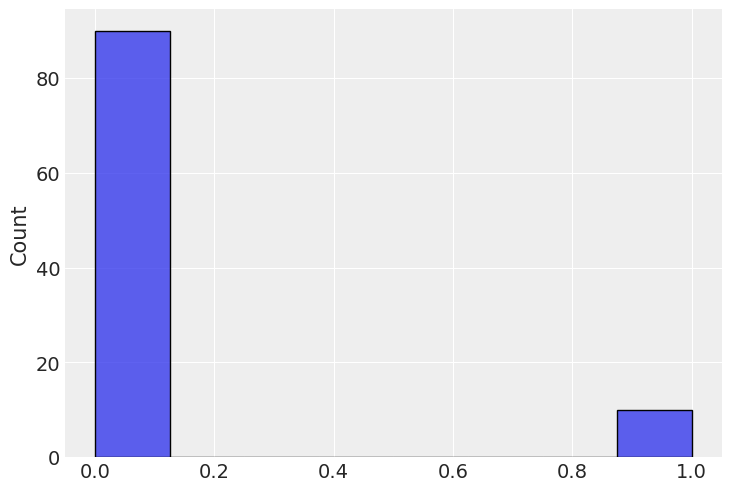

In [5]:
sns.histplot(b_observations);

We could choose to summarize the information numerically as well

In [6]:
pd.DataFrame(b_observations).value_counts()

0.0    90
1.0    10
dtype: int64

# Probability Distribution
Observational distributions are great, it answers our questions of *How many converted in 100?* 

But what if we instead ask _"What is the probability a single person will convert?"_

Simple! We can plot out *empirical* estimate of the probability by just adding one keyword argument. Compare this against our previous figure and note the y axis has been changed from count to observed probability

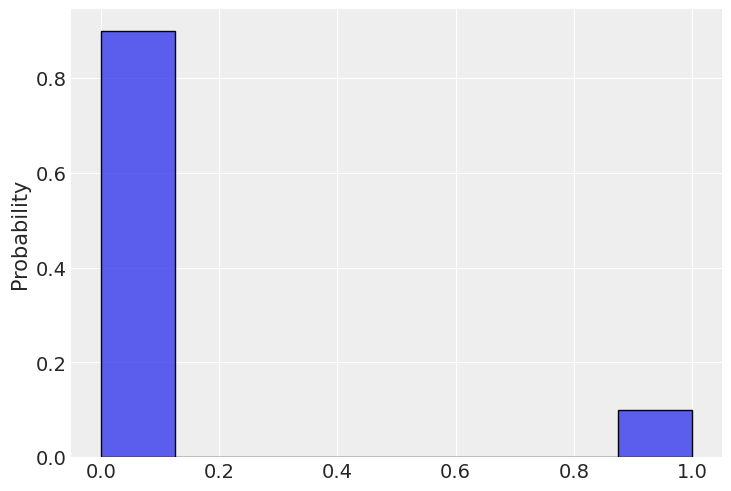

In [7]:
sns.histplot(b_observations, stat="probability");

We took our counts of conversions and non conversions and divided by the total count, shown below.

In [8]:
obs = pd.DataFrame(b_observations)
obs.value_counts() / obs.shape[0]

0.0    0.9
1.0    0.1
dtype: float64

This allows us to meet the fundamental rule of probability distributions that the total area must sum to 1.

# 🔑 Parameter Space and Observation space as distinct spaces
There is a mathematical *observed* space and a *parameter space*.

In our example the count of conversions is in observed space because we can "see it" whereas the probability of conversion is a parameter we are estimating.

We'll revisit this idea many times throughout this course. It's fundamental to Bayesian modeling.

# How sure are about our parameter estimate, p(Conversion)?
From our experiment with 100 people we saw 10% converted, but how sure are we?

What if we ran an experiment with 10 people? Let's use our same array. We'll also use the mean function which will give us the probability of a conversion, same as we did before but with less code

In [9]:
b_observations[:10].mean()

0.2

Well this is weird, with 100 observations we got 10%, but now we have 20%? Which number is correct?

# What if we just had one observation, what would P(conversion) be?
Let's take this to the extreme. What if we just had one observation?


In [10]:
b_observations[0].mean()

0.0

0% conversion? What our experiment a total failure?

But between you and I with only one observation do we really feel certain about our estimate of p?

# Uncertainty in P(conversion)
The truth is we might never know the exact conversion ratio, but we do know that a single number doesn't adequately communicate our confidence in our belief in P

# Communicating uncertainty with distributions
To communicate uncertainty we can use, you guessed it, a distribution. The distribution below shows one possible belief set for p values. 

The x axis is every possible value of *probability of conversion* and the blue line is our relative belief in each value.

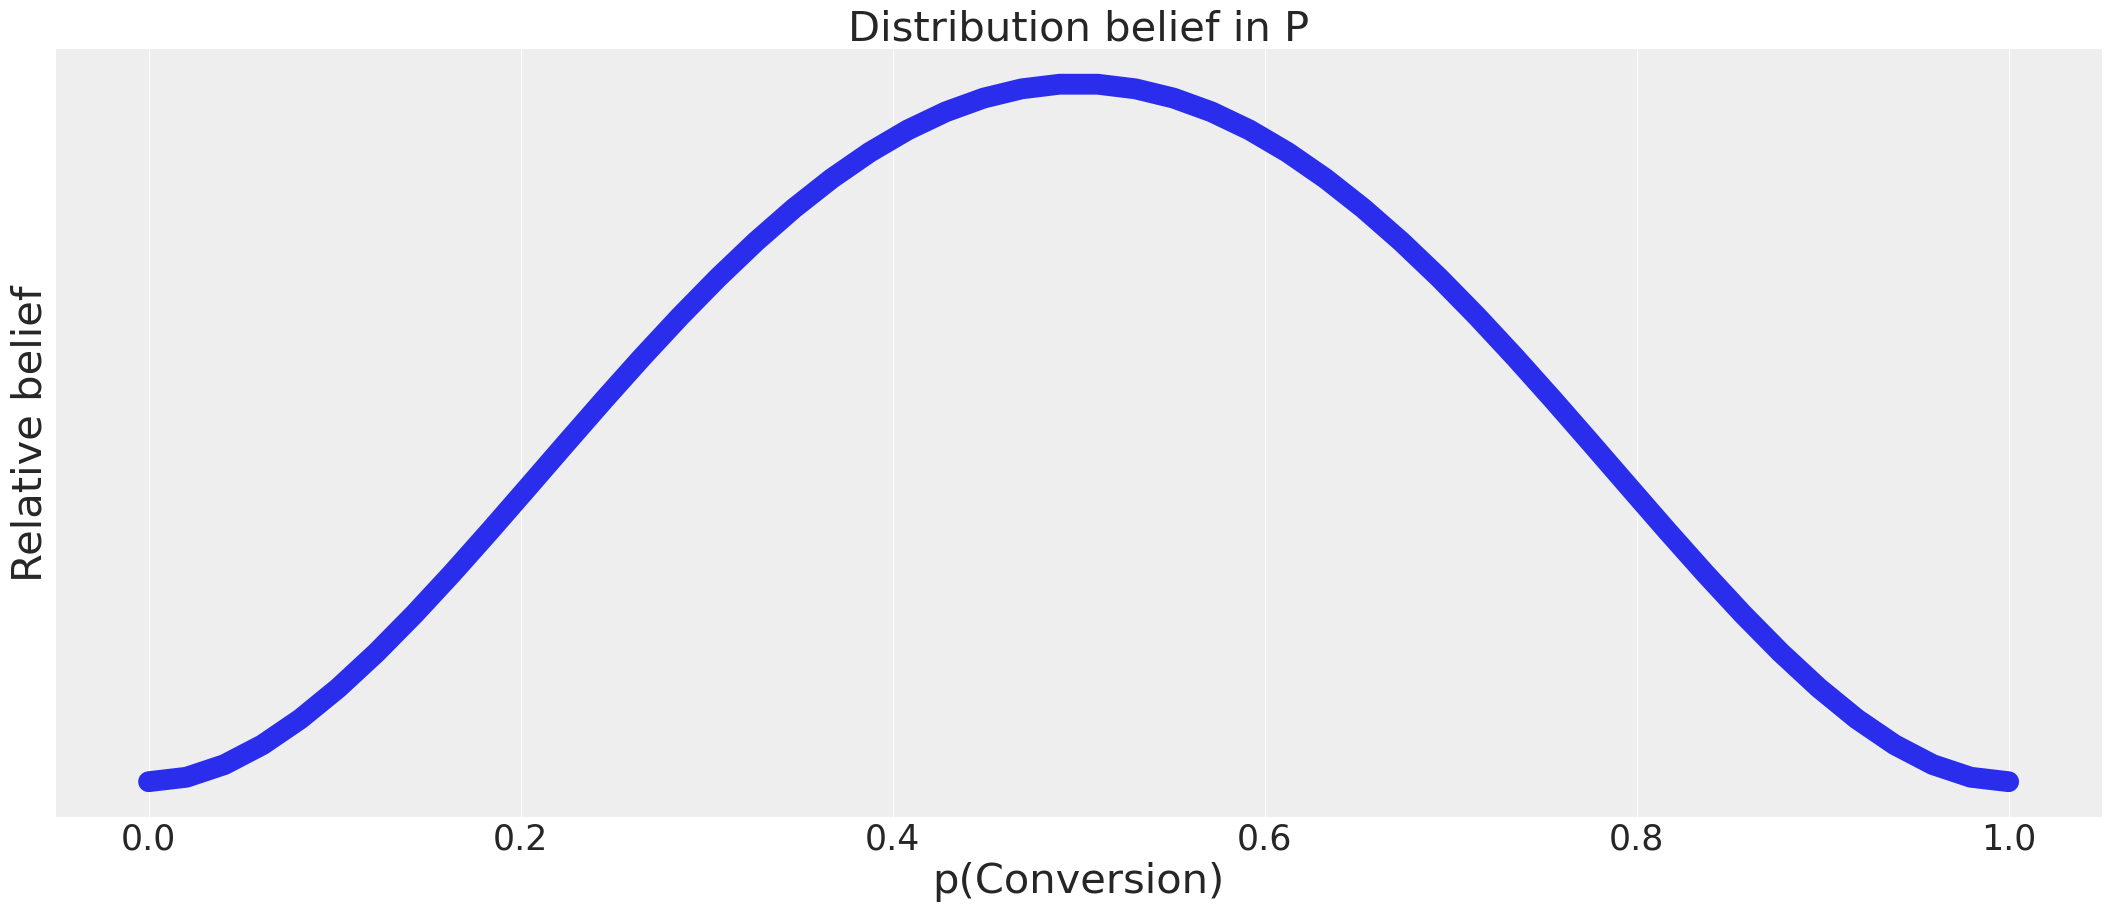

In [11]:
beta_dist = stats.beta(3, 3)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)


# A possible belief distribution for  conversion
Given our results from the full `b_observations` array our beliefs of p(conversion) may look like the distribution below. 

We're *pretty sure* 10% is the most likely p conversion value, but 5% and 20% might be plausible as well. 0% and 100% are definitely out though.  

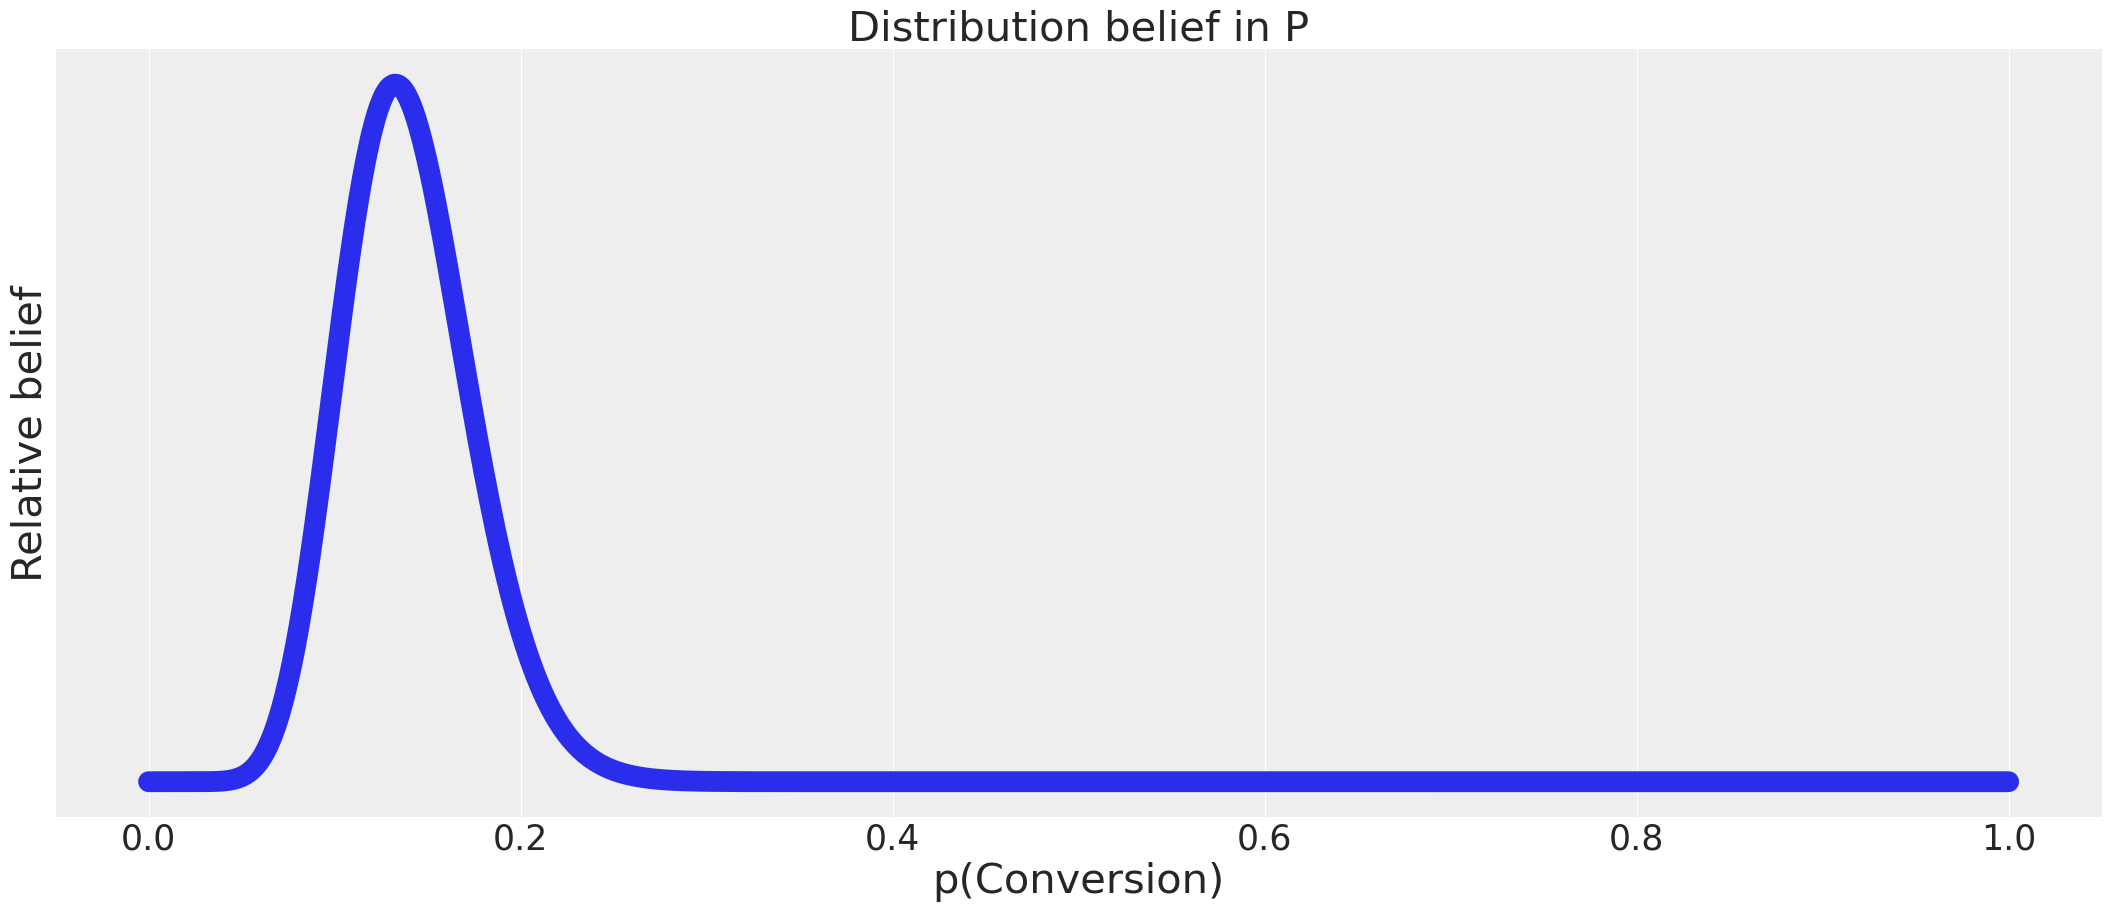

In [12]:
beta_dist = stats.beta(14, 86)
x = np.linspace(0, 1, 1000)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# 🔑 Expressing not just one belief, but many beliefs
The key idea in distributions is that we don't just believe *one* value, we believe *every* value and can precisely describe by how much.

This distributional belief system is a key differentiator of Bayesian approaches versus most other machine learning methods as you will see later in this course.

# Section Recap
* Distributions can describe many things, such as probability, observations, and parameters
    * The values of things we can directly observe
    * Our beliefs in the parameters that we can't directly observe
* Probabilities which are a *special case* of distributions
* Distributions let us express not one belief in the world, but all our beliefs and the relative belief in each

# Skipped slides

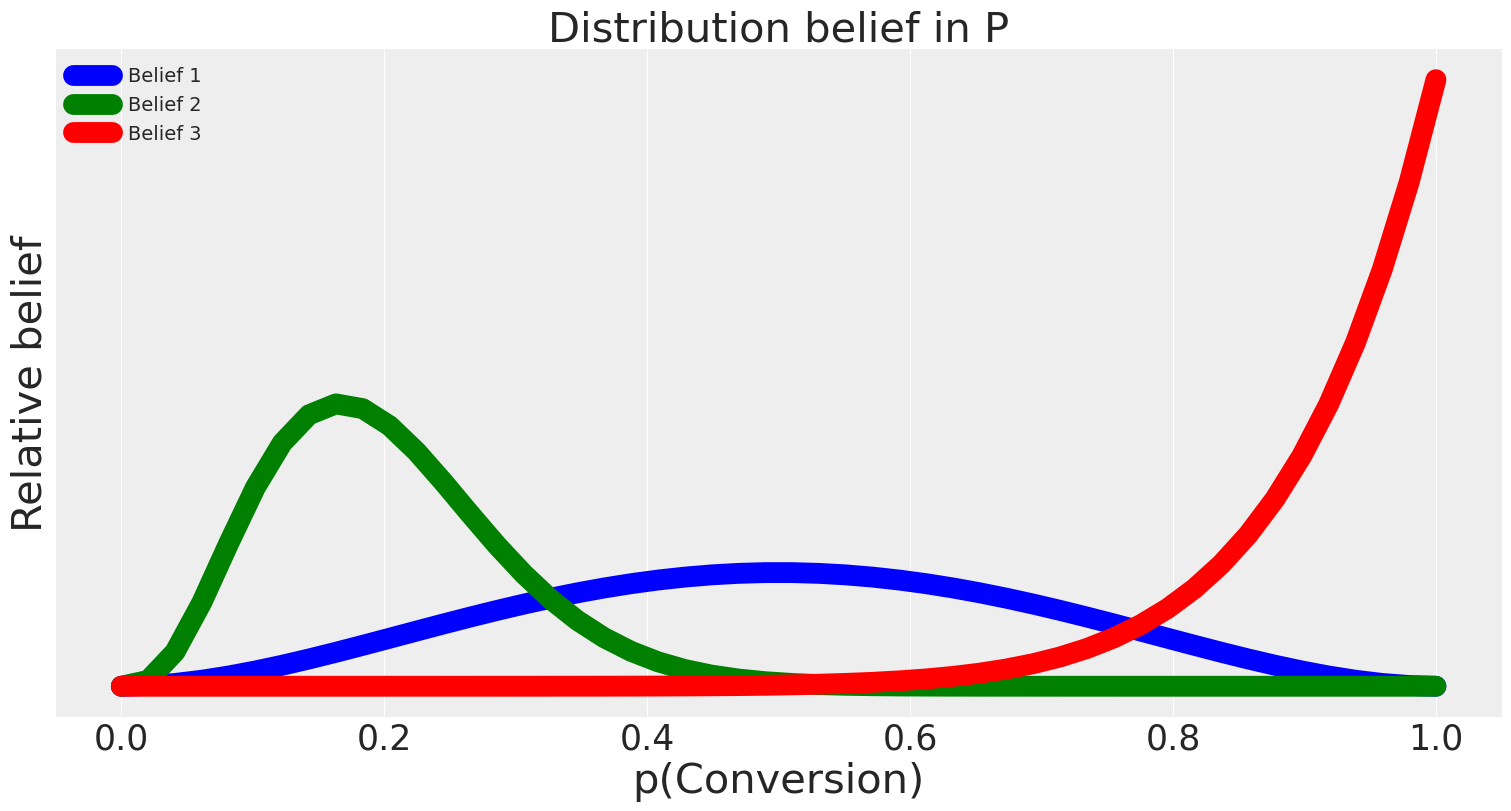

In [13]:
# Skipped 
fig, ax = plt.subplots(figsize=(15,8))

for i, (a, b, c) in enumerate(((3,3,'blue'), (4,16,'green'), (10,1,'red'))):

    beta_dist = stats.beta(a, b)
    x = np.linspace(0, 1)
    y = beta_dist.pdf(x)
    ax.plot(x,y, linewidth=15, c=c, label=f"Belief {i+1}")

    ax.set_yticks([])
    ax.set_title("Distribution belief in P", fontsize=30)
    ax.set_xlabel("p(Conversion)", fontsize=30)
    ax.set_ylabel("Relative belief", fontsize=30)
    ax.tick_params(axis='x', labelsize=25)

ax.legend()